In [1]:
%matplotlib inline
from pymatgen.core.periodic_table import Element
from pymatgen.io.vasp import Vasprun 
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.electronic_structure.core import Spin, OrbitalType

c:\program files\python\lib\site-packages\pymatgen\io\vasp\inputs.py:1799: UnknownPotcarWarning: POTCAR with symbol Pb_d has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_54', 'PBE_52', 'unvie_PBE_52']
  UnknownPotcarWarning,
c:\program files\python\lib\site-packages\pymatgen\io\vasp\inputs.py:1799: UnknownPotcarWarning: POTCAR with symbol I has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_54', 'PBE_52', 'unvie_PBE_52']
  UnknownPotcarWarning,
c:\program files\python\lib\site-packages\pymatgen\io\vasp\inputs.py:1799: UnknownPotcarWarning: POTCAR with symbol C has metadata that does not match                          any VASP POTCAR known to pymatgen. The 

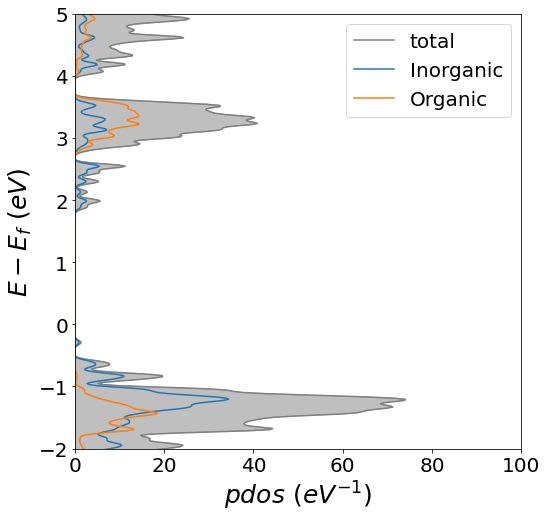

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

Ef=1.0974

dosrun = Vasprun('./3_dos/vasprun.xml')
cdos = dosrun.complete_dos
element_dos = cdos.get_element_dos()
x_total=dosrun.tdos.densities[Spin.up]
x_H=element_dos[Element('H')].densities[Spin.up]
x_C=element_dos[Element('C')].densities[Spin.up]
x_N=element_dos[Element('N')].densities[Spin.up]
x_Pb=element_dos[Element('Pb')].densities[Spin.up]
x_I=element_dos[Element('I')].densities[Spin.up]
x_F=element_dos[Element('F')].densities[Spin.up]
y=dosrun.tdos.energies - Ef

plt.fill_betweenx(y,[0]*len(x_total),x_total,color="gray",alpha=0.5)
plt.plot(x_total,y,color="gray",label="total")
plt.plot(x_Pb+x_I,y,label="Inorganic")
plt.plot(x_H+x_C+x_N+x_F,y,label="Organic")
"""
plt.plot(x_H,y,label="H",color="lightgreen")
plt.plot(x_C,y,label="C",color="cyan")
plt.plot(x_N,y,label="N",color="blue")
plt.plot(x_Bi,y,label="Bi",color="red")
plt.plot(x_Br,y,label="Br",color="purple")
plt.plot(x_Ag,y,label="Ag",color="green")
#plt.plot(x_H+x_C+x_N+x_Pb+x_I,y)
"""

plt.ylim(-2,5)
plt.xlim(0,100)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("$pdos\ (eV^{-1})$",fontsize=25)
plt.ylabel("$E-E_f\ (eV)$",fontsize=25)
plt.legend(fontsize=20)
plt.show()

In [5]:
#This part takes very long time!
import matplotlib.pyplot as plt
import numpy as np

steps=10

run1 = BSVasprun("./4_band/vasprun.xml", parse_projected_eigen = True)  # 读取vasprun.xml
bands1 = run1.get_band_structure(kpoints_filename="./4_band/KPOINTS", line_mode=True, efermi=dosrun.efermi)

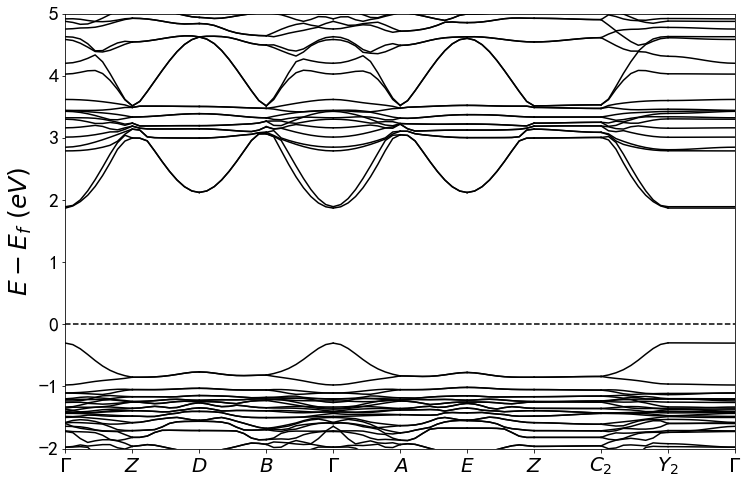

In [9]:
hskps=[k for k in range(0,len(bands1.kpoints)-1,steps-1)]#无头尾

labels=[r"$\Gamma$",r"$Z$",r"$D$",r"$B$",r"$\Gamma$",r"$A$",r"$E$",r"$Z$",r"$C_2$",r"$Y_2$",r"$\Gamma$"]

#x轴
kptslist = np.arange(len(bands1.kpoints))

#依次读取每一条能带
bandTraces = list()
for band in range(bands1.nb_bands):
    bandTraces.append(bands1.bands[Spin.up][band])
    
bandTraces=np.array(bandTraces)-Ef

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12,8))
for band in range(bands1.nb_bands):
    for i in range(len(labels)-1):
        plt.plot(kptslist[i*steps:(i+1)*steps]-i,bandTraces[band,i*steps:(i+1)*steps],color="black")
"""
for i in hskps[1:-1]:
    plt.plot([i,i],[bandTraces.min(),bandTraces.max()],color="black",linestyle="--")
"""
plt.xticks(hskps,labels)
plt.ylim(-2,5)
plt.xlim(kptslist.min(),kptslist.max()-i)

#plt.plot([kptslist.min(),kptslist.max()+0.1],[1.3,1.3],color="red")
plt.plot([kptslist.min(),kptslist.max()+0.1],[0,0],color="black",linestyle="--")


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel("k Points",fontsize=25)
plt.ylabel("$E-E_f\ (eV)$",fontsize=25)
plt.show()

c:\program files\python\lib\site-packages\pymatgen\io\vasp\inputs.py:1799: UnknownPotcarWarning: POTCAR with symbol Pb_d has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_54', 'PBE_52', 'unvie_PBE_52']
  UnknownPotcarWarning,
c:\program files\python\lib\site-packages\pymatgen\io\vasp\inputs.py:1799: UnknownPotcarWarning: POTCAR with symbol I has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_54', 'PBE_52', 'unvie_PBE_52']
  UnknownPotcarWarning,
c:\program files\python\lib\site-packages\pymatgen\io\vasp\inputs.py:1799: UnknownPotcarWarning: POTCAR with symbol C has metadata that does not match                          any VASP POTCAR known to pymatgen. The 

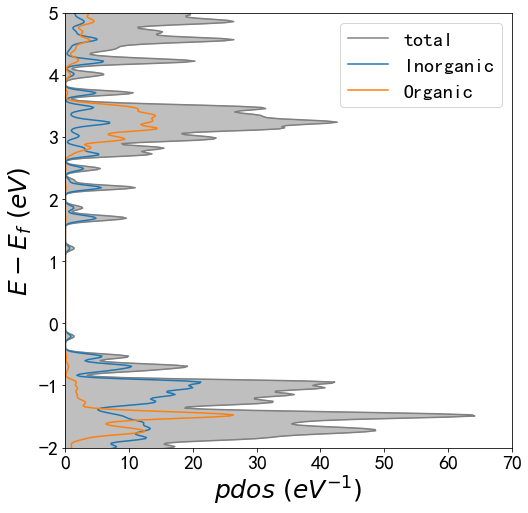

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

Ef=1.1616

dosrun = Vasprun('./5_soc/vasprun.xml')
cdos = dosrun.complete_dos
element_dos = cdos.get_element_dos()
x_total=dosrun.tdos.densities[Spin.up]
x_H=element_dos[Element('H')].densities[Spin.up]
x_C=element_dos[Element('C')].densities[Spin.up]
x_N=element_dos[Element('N')].densities[Spin.up]
x_Pb=element_dos[Element('Pb')].densities[Spin.up]
x_I=element_dos[Element('I')].densities[Spin.up]
x_F=element_dos[Element('F')].densities[Spin.up]
y=dosrun.tdos.energies - Ef

plt.fill_betweenx(y,[0]*len(x_total),x_total,color="gray",alpha=0.5)
plt.plot(x_total,y,color="gray",label="total")
plt.plot(x_Pb+x_I,y,label="Inorganic")
plt.plot(x_H+x_C+x_N+x_F,y,label="Organic")
"""
plt.plot(x_H,y,label="H",color="lightgreen")
plt.plot(x_C,y,label="C",color="cyan")
plt.plot(x_N,y,label="N",color="blue")
plt.plot(x_Bi,y,label="Bi",color="red")
plt.plot(x_Br,y,label="Br",color="purple")
plt.plot(x_Ag,y,label="Ag",color="green")
#plt.plot(x_H+x_C+x_N+x_Pb+x_I,y)
"""

plt.ylim(-2,5)
plt.xlim(0,70)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("$pdos\ (eV^{-1})$",fontsize=25)
plt.ylabel("$E-E_f\ (eV)$",fontsize=25)
plt.legend(fontsize=20)
plt.show()

In [12]:
#This part takes very long time!
import matplotlib.pyplot as plt
import numpy as np

steps=10

run1 = BSVasprun("./6_soc_band/vasprun.xml", parse_projected_eigen = True)  # 读取vasprun.xml
bands1 = run1.get_band_structure(kpoints_filename="./6_soc_band/KPOINTS", line_mode=True, efermi=dosrun.efermi)

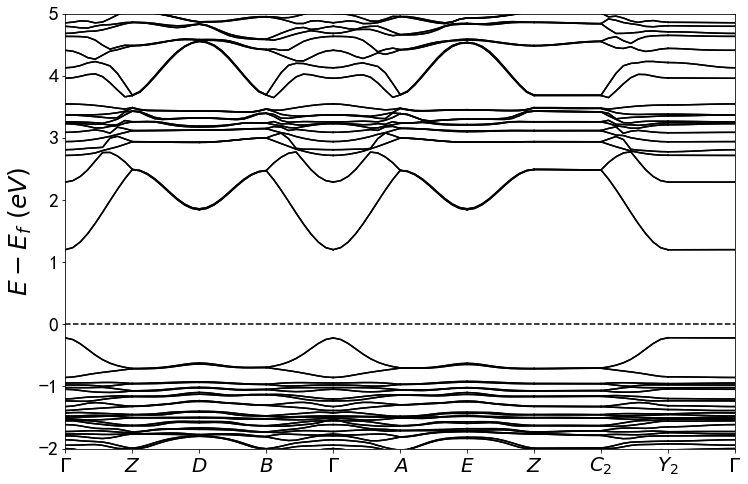

In [13]:
hskps=[k for k in range(0,len(bands1.kpoints)-1,steps-1)]#无头尾

labels=[r"$\Gamma$",r"$Z$",r"$D$",r"$B$",r"$\Gamma$",r"$A$",r"$E$",r"$Z$",r"$C_2$",r"$Y_2$",r"$\Gamma$"]

#x轴
kptslist = np.arange(len(bands1.kpoints))

#依次读取每一条能带
bandTraces = list()
for band in range(bands1.nb_bands):
    bandTraces.append(bands1.bands[Spin.up][band])
    
bandTraces=np.array(bandTraces)-Ef

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12,8))
for band in range(bands1.nb_bands):
    for i in range(len(labels)-1):
        plt.plot(kptslist[i*steps:(i+1)*steps]-i,bandTraces[band,i*steps:(i+1)*steps],color="black")
"""
for i in hskps[1:-1]:
    plt.plot([i,i],[bandTraces.min(),bandTraces.max()],color="black",linestyle="--")
"""
plt.xticks(hskps,labels)
plt.ylim(-2,5)
plt.xlim(kptslist.min(),kptslist.max()-i)

#plt.plot([kptslist.min(),kptslist.max()+0.1],[1.3,1.3],color="red")
plt.plot([kptslist.min(),kptslist.max()+0.1],[0,0],color="black",linestyle="--")


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel("k Points",fontsize=25)
plt.ylabel("$E-E_f\ (eV)$",fontsize=25)
plt.show()